In [2]:
import json
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define competition Id
competitionID='IT1'

# Evento partita per tipo per minuto di gioco

In [4]:
# For each club in the competition, fetch all the game events
clubs = requests.get(f'http://localhost:8080/mongo/games/competition/{competitionID}/clubs').json()
data = np.array([])
for club in clubs:
    response = requests.get(f'http://localhost:8080/mongo/game_events/club/{club}').json()
    data = np.hstack((data, response))
    
events_df = pd.DataFrame.from_records(data)
events_df

,_id,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,6578966ee2ebee12cbd63b66,a178855b03c90363b05e8ea9df8b69f0,2012-08-26T00:00:00.000Z,2251270,90,Cards,5,5856,1. Yellow card,NaN,NaN
1,6578966ee2ebee12cbd63b68,34187f475d26ec421ea2216aa9802921,2012-08-26T00:00:00.000Z,2251270,61,Substitutions,5,15511,", Not reported",20586.0,NaN
2,6578966ee2ebee12cbd63b69,ff36f025093670a2ab4dc4184b06f11c,2012-08-26T00:00:00.000Z,2251270,68,Cards,5,16922,1. Yellow card,NaN,NaN
3,6578966ee2ebee12cbd63b6a,09c14f9dd6d472f96d096dc0449d1339,2012-08-26T00:00:00.000Z,2251270,75,Substitutions,5,22203,", Not reported",43760.0,NaN
4,6578966ee2ebee12cbd63b73,060b43e41b6512ca63c765f133169044,2012-08-26T00:00:00.000Z,2251270,55,Substitutions,5,94529,", Not reported",19447.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55254,6578967ae2ebee12cbdf8196,322b49bac59aa9f7b840019a2dd39177,2023-11-02T00:00:00.000Z,4161040,98,Goals,8970,627226,", Right-footed shot, 1. Tournament Goal Assist...",NaN,620477.0
55255,6578967ae2ebee12cbdf8197,238a88cc1e8833ac1d2dfeed75267b06,2023-11-02T00:00:00.000Z,4161040,109,Cards,8970,668951,"1. Yellow card , Foul",NaN,NaN
55256,6578967ae2ebee12cbdf8198,dae5ff99baf776c576ed84866870fcf3,2023-11-02T00:00:00.000Z,4161040,74,Cards,8970,744728,"1. Yellow card , Foul",NaN,NaN
55257,6578967ae2ebee12cbdf8199,4e120eb936a0bfee20209742476be627,2023-11-02T00:00:00.000Z,4161040,5,Goals,8970,744728,", Right-footed shot, 1. Tournament Goal Assist...",NaN,226025.0


<Axes: xlabel='type', ylabel='minute'>

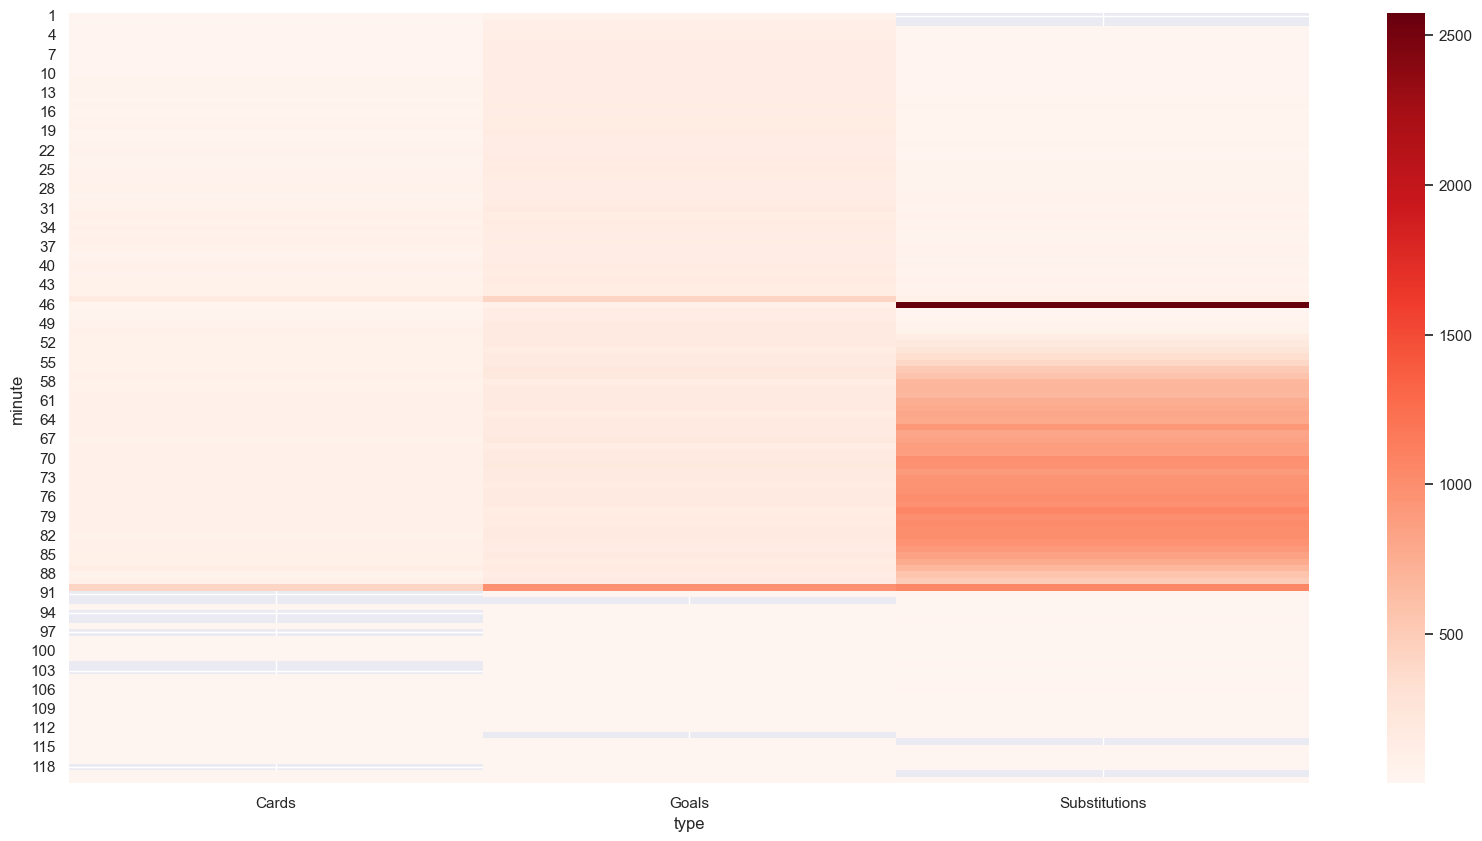

In [5]:
# Group events by type and minute
events_minute_available_df = events_df.query('minute != -1') # Remove "undefined" events
events_by_minute = events_minute_available_df.groupby(['type', 'minute']).size().reset_index(name='event_count')
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(events_by_minute.pivot(index='minute', columns='type', values='event_count'), cmap='Reds')

Ci siamo chiesti quando determinati eventi in partita fossero piu' comuni per cui abbiamo deciso di creare una heatmap che mostrasse quanti eventi di ogni tipo sono registrati per ogni minuto di gioco.

# Goal medi per partita di club in casa e in trasferta

In [6]:
# Request games in the competition and clean up DataFrame
response = requests.get(f'http://localhost:8080/mongo/games/competition/{competitionID}').json()
games_df = pd.DataFrame(response)
games_df.drop(columns=['_id', 'round','competition_id', 'date', 'home_club_position', 'away_club_position', 'away_club_manager_name', 'home_club_manager_name', 'referee', 'url', 'competition_type', 'stadium', 'attendance'], inplace=True)

games_df

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate
0,4103597,2023,276,1005,2,2,4-2-3-1,4-3-2-1,Verona Hellas Football Club,Unione Sportiva Lecce,2:2
1,4103593,2023,1025,416,2,0,4-1-4-1,3-4-1-2,Bologna Football Club 1909,Torino Calcio,2:0
2,4103600,2023,12,410,3,1,3-5-2 flat,3-5-2 flat,Associazione Sportiva Roma,Udinese Calcio,3:1
3,4103598,2023,506,46,1,1,3-5-2 flat,3-5-2 flat,Juventus Football Club,Football Club Internazionale Milano S.p.A.,1:1
4,4103596,2023,8970,252,2,1,4-2-3-1,3-5-2 flat,Frosinone Calcio S.r.l.,Genoa Cricket and Football Club,2:1
...,...,...,...,...,...,...,...,...,...,...,...
4305,2251272,2012,458,6195,0,3,,,Palermo FC,Società Sportiva Calcio Napoli,0:3
4306,2251263,2012,800,398,0,1,,,Atalanta Bergamasca Calcio S.p.a.,Società Sportiva Lazio S.p.A.,0:1
4307,2251268,2012,12,1627,2,2,,,Associazione Sportiva Roma,Catania FC,2:2
4308,2251265,2012,430,410,2,1,,,Associazione Calcio Fiorentina,Udinese Calcio,2:1


<Axes: xlabel='Club Type', ylabel='Average Goals'>

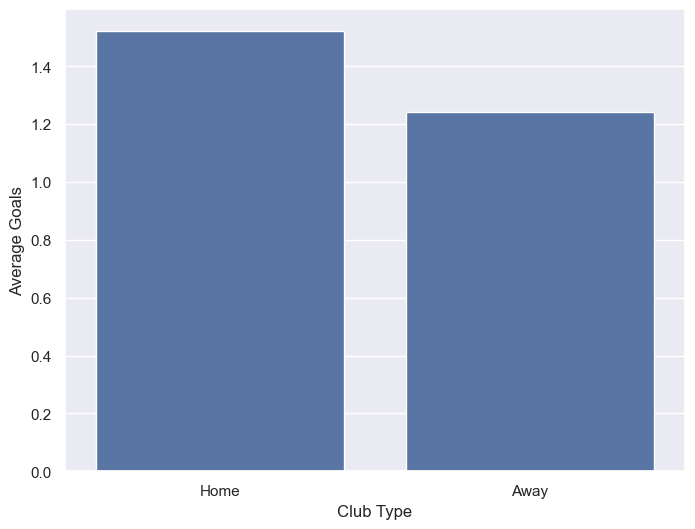

In [7]:
avg_home_club_goals = games_df['home_club_goals'].mean()
avg_away_club_goals = games_df['away_club_goals'].mean()

goals_data = {'Average Goals': [avg_home_club_goals, avg_away_club_goals],
        'Club Type': ['Home', 'Away']}
avg_goals_df = pd.DataFrame(goals_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Club Type', y='Average Goals', data=avg_goals_df)

# Percentuale di vittoria di club in casa e in trasferta

In [8]:
# Prepare dataset columns
games_df['home_win'] = games_df[['home_club_goals', 'away_club_goals']].apply(lambda row : row['home_club_goals'] > row['away_club_goals'], axis=1)
games_df['away_win'] = games_df[['home_club_goals', 'away_club_goals']].apply(lambda row : row['home_club_goals'] < row['away_club_goals'], axis=1)
games_df['draw'] = games_df[['home_club_goals', 'away_club_goals']].apply(lambda row : row['home_club_goals'] == row['away_club_goals'], axis=1)
games_df

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,home_win,away_win,draw
0,4103597,2023,276,1005,2,2,4-2-3-1,4-3-2-1,Verona Hellas Football Club,Unione Sportiva Lecce,2:2,False,False,True
1,4103593,2023,1025,416,2,0,4-1-4-1,3-4-1-2,Bologna Football Club 1909,Torino Calcio,2:0,True,False,False
2,4103600,2023,12,410,3,1,3-5-2 flat,3-5-2 flat,Associazione Sportiva Roma,Udinese Calcio,3:1,True,False,False
3,4103598,2023,506,46,1,1,3-5-2 flat,3-5-2 flat,Juventus Football Club,Football Club Internazionale Milano S.p.A.,1:1,False,False,True
4,4103596,2023,8970,252,2,1,4-2-3-1,3-5-2 flat,Frosinone Calcio S.r.l.,Genoa Cricket and Football Club,2:1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2251272,2012,458,6195,0,3,,,Palermo FC,Società Sportiva Calcio Napoli,0:3,False,True,False
4306,2251263,2012,800,398,0,1,,,Atalanta Bergamasca Calcio S.p.a.,Società Sportiva Lazio S.p.A.,0:1,False,True,False
4307,2251268,2012,12,1627,2,2,,,Associazione Sportiva Roma,Catania FC,2:2,False,False,True
4308,2251265,2012,430,410,2,1,,,Associazione Calcio Fiorentina,Udinese Calcio,2:1,True,False,False


<Axes: xlabel='Club Type', ylabel='Winrate'>

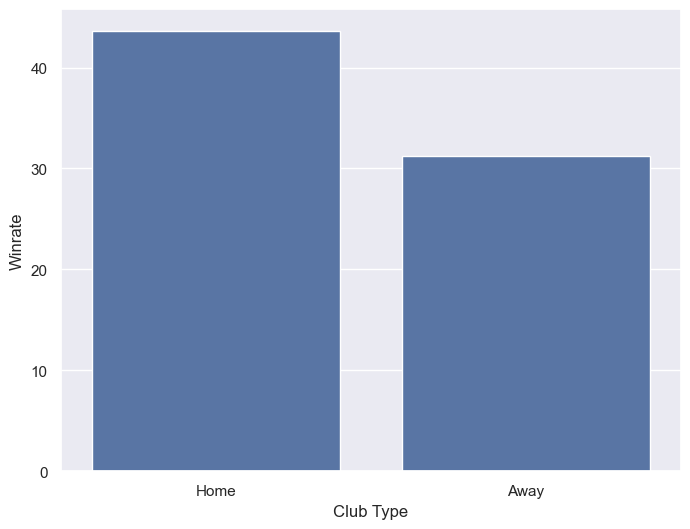

In [9]:
# Count where home club or away club won
home_win_count = games_df['home_win'].value_counts().get(True, 0)
away_win_count = games_df['away_win'].value_counts().get(True, 0)
# Calculate winrate
home_winrate = home_win_count/len(games_df)*100
away_winrate = away_win_count/len(games_df)*100

winrate_data = {'Winrate': [home_winrate, away_winrate],
        'Club Type': ['Home', 'Away']}

winrate_df = pd.DataFrame(winrate_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Club Type', y='Winrate', data=winrate_df)

# Efficacia formazioni

In [10]:
games_df_clean = games_df.query('home_club_formation != "" and away_club_formation != ""')
games_df_clean

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,home_win,away_win,draw
0,4103597,2023,276,1005,2,2,4-2-3-1,4-3-2-1,Verona Hellas Football Club,Unione Sportiva Lecce,2:2,False,False,True
1,4103593,2023,1025,416,2,0,4-1-4-1,3-4-1-2,Bologna Football Club 1909,Torino Calcio,2:0,True,False,False
2,4103600,2023,12,410,3,1,3-5-2 flat,3-5-2 flat,Associazione Sportiva Roma,Udinese Calcio,3:1,True,False,False
3,4103598,2023,506,46,1,1,3-5-2 flat,3-5-2 flat,Juventus Football Club,Football Club Internazionale Milano S.p.A.,1:1,False,False,True
4,4103596,2023,8970,252,2,1,4-2-3-1,3-5-2 flat,Frosinone Calcio S.r.l.,Genoa Cricket and Football Club,2:1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4103481,2023,410,506,0,3,3-5-2 flat,3-5-2 flat,Udinese Calcio,Juventus Football Club,0:3,False,True,False
126,4103475,2023,252,430,1,4,3-5-2 flat,4-2-3-1,Genoa Cricket and Football Club,Associazione Calcio Fiorentina,1:4,False,True,False
127,4103474,2023,8970,6195,1,3,4-3-3 Attacking,4-3-3 Attacking,Frosinone Calcio S.r.l.,Società Sportiva Calcio Napoli,1:3,False,True,False
128,4103473,2023,749,276,0,1,4-2-3-1,3-4-2-1,Empoli Football Club S.r.l.,Verona Hellas Football Club,0:1,False,True,False


In [11]:
# Define the matrix calculating the winrate while aggregating
win_rate_matrix = pd.crosstab(games_df_clean['home_club_formation'], games_df_clean['away_club_formation'], values=games_df_clean['home_win'], aggfunc='mean')
win_rate_matrix = win_rate_matrix.round(2)
win_rate_matrix

away_club_formation,3-4-1-2,3-4-2-1,3-4-3,3-5-2,3-5-2 flat,4-2-3-1,4-3-1-2,4-3-2-1,4-3-3 Attacking,4-4-2 double 6
home_club_formation,,,,,,,,,,
3-4-1-2,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
3-4-2-1,0.0,0.29,NaN,NaN,0.20,0.33,NaN,1.0,0.33,NaN
3-4-3,NaN,1.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
3-5-2 flat,1.0,0.71,1.0,NaN,0.38,0.22,NaN,NaN,0.60,NaN
4-1-4-1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-2-3-1,1.0,0.50,NaN,0.0,0.50,0.67,NaN,0.5,0.20,1.0
4-3-1-2,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
4-3-2-1,NaN,1.00,NaN,NaN,0.00,1.00,0.0,NaN,NaN,NaN
4-3-3 Attacking,0.5,0.67,NaN,NaN,0.20,0.38,NaN,0.0,0.43,1.0


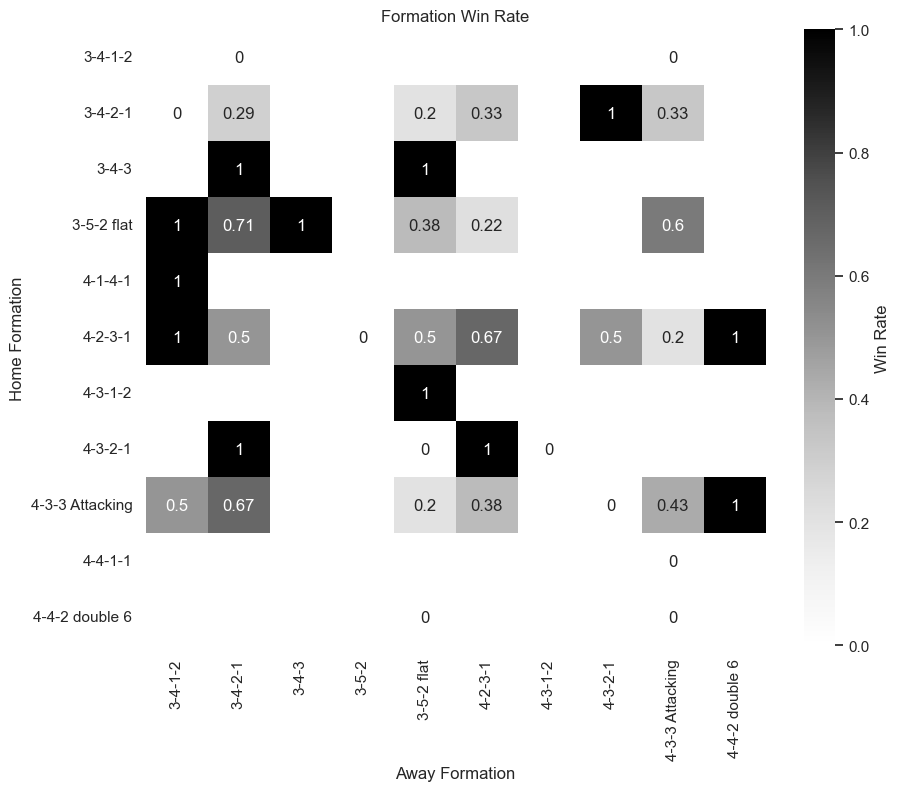

In [12]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.set(style='white')
sns.heatmap(win_rate_matrix, annot=True, cmap='Greys', fmt="g",cbar_kws={'label': 'Win Rate'})
plt.title('Formation Win Rate')
plt.xlabel('Away Formation')
plt.ylabel('Home Formation')
plt.show()

Heatmap, la percentuale di vittoria si riferisce alla formazione sulla sinistra del grafico

# Valori di mercato dei giocatori per paese di provenienza

In [13]:
# Fetch players data
response = requests.get(f'http://localhost:8080/sql/players').json()
players_df = pd.DataFrame(response)

In [14]:
# Make dataset lighter, clean and aggregate
players_df = players_df[['countryOfBirth', 'marketValueInEur']]
players_df.dropna(subset=['countryOfBirth', 'marketValueInEur'], inplace=True)

players_df_mean = players_df.groupby('countryOfBirth')['marketValueInEur'].mean().reset_index()
players_df_mean['marketValueInEur'] = players_df_mean['marketValueInEur']
pd.options.display.float_format = '{:.2f}M'.format

players_df_mean

,countryOfBirth,marketValueInEur
0,Albania,1129868.42M
1,Algeria,3603125.00M
2,Andorra,500000.00M
3,Angola,4445000.00M
4,Argentina,3746805.23M
...,...,...
168,Wales,2408552.63M
169,Yugoslavia (Republic),2386478.49M
170,Zaire,1143103.45M
171,Zambia,2832142.86M


In [15]:
data_directory= "C:/Users/capsi/Desktop/Data/"
countries_gdf= gpd.read_file(data_directory+"ne_10m_admin_0_countries.shp")
countries_gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [16]:
unmatched_countries_players = set(players_df_mean['countryOfBirth']) - set(countries_gdf['ADMIN'])
unmatched_countries_admin = set(countries_gdf['ADMIN']) - set(players_df_mean['countryOfBirth'])


print("Countries in players_df_mean but not in countries_gdf:")
print(unmatched_countries_players)

print("\nCountries in countries_gdf but not in players_df_mean:")
print(unmatched_countries_admin)

Countries in players_df_mean but not in countries_gdf:
{'Wales', 'Hongkong', 'French Guiana', "Cote d'Ivoire", 'Jugoslawien (SFR)', 'Netherlands Antilles', 'Congo', 'East Germany (GDR)', 'England', 'Sao Tome and Principe', 'St. Lucia', 'DR Congo', 'Mayotte', 'Cape Verde', 'Northern Ireland', 'Guadeloupe', 'UdSSR', 'Tanzania', 'Serbia and Montenegro', 'Martinique', 'Czech Republic', 'Bosnia-Herzegovina', 'CSSR', 'Yugoslavia (Republic)', 'Scotland', 'The Gambia', "People's republic of the Congo", 'Curacao', 'Neukaledonien', 'Réunion', 'Zaire', 'Korea, South', 'United States', 'Macedonia'}

Countries in countries_gdf but not in players_df_mean:
{'Siachen Glacier', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Dhekelia Sovereign Base Area', 'Democratic Republic of the Congo', 'American Samoa', 'Brazilian Island', 'Cayman Islands', 'Antarctica', 'Nepal', 'Saint Barthelemy', 'Yemen', 'United States Virgin Islands', 'Seychelles', 'Antigua and Barbuda', 'British Virgin Islands', 'Angu

In [17]:
translation_dictionary = {
    'The Gambia': 'Gambia',
    'Northern Ireland': 'United Kingdom',
    'Cape Verde': 'Cabo Verde',
    'St. Lucia': 'Saint Lucia',
    'People\'s republic of the Congo': 'Congo',
    'Scotland': 'United Kingdom',
    'Martinique': 'France',
    'East Germany (GDR)': 'Germany',
    'Netherlands Antilles': 'Netherlands',
    'Guadeloupe': 'France',
    'Congo': 'Democratic Republic of the Congo',
    'DR Congo': 'Democratic Republic of the Congo',
    'Mayotte': 'Comoros',
    'Wales': 'United Kingdom',
    'Curacao': 'Netherlands',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Neukaledonien': 'New Caledonia',
    'Serbia and Montenegro': 'Serbia',
    'Jugoslawien (SFR)': 'Yugoslavia',
    'UdSSR': 'Soviet Union',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Réunion': 'France',
    'Czech Republic': 'Czechia',
    'Yugoslavia (Republic)': 'Yugoslavia',
    'Zaire': 'Congo',
    'French Guiana': 'France',
    'Macedonia': 'North Macedonia',
    'Tanzania': 'United Republic of Tanzania',
    'England': 'United Kingdom',
    'CSSR': 'Czechoslovakia',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'Korea, South': 'South Korea',
    'United States': 'United States of America',
    'Hongkong': 'Hong Kong'
}

clean_data = players_df_mean
clean_data['countryOfBirth'] = clean_data['countryOfBirth'].map(translation_dictionary).fillna(players_df_mean['countryOfBirth'])

clean_data

,countryOfBirth,marketValueInEur
0,Albania,1129868.42M
1,Algeria,3603125.00M
2,Andorra,500000.00M
3,Angola,4445000.00M
4,Argentina,3746805.23M
...,...,...
168,United Kingdom,2408552.63M
169,Yugoslavia,2386478.49M
170,Congo,1143103.45M
171,Zambia,2832142.86M


In [18]:
# Group again, merge and show map
clean_data = clean_data.groupby('countryOfBirth')['marketValueInEur'].mean().reset_index()
clean_data

,countryOfBirth,marketValueInEur
0,Albania,1129868.42M
1,Algeria,3603125.00M
2,Andorra,500000.00M
3,Angola,4445000.00M
4,Argentina,3746805.23M
...,...,...
153,Venezuela,980092.59M
154,Vietnam,275000.00M
155,Yugoslavia,1511100.95M
156,Zambia,2832142.86M


In [36]:
world_data_gdf = countries_gdf.merge(clean_data, left_on='ADMIN', right_on='countryOfBirth', how='left')
desired_projection = 'EPSG:3857' 
world_data_gdf= world_data_gdf.to_crs(desired_projection)
world_data_gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,countryOfBirth,marketValueInEur
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",Indonesia,2058333.33M
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",Malaysia,366666.67M
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",Chile,1616860.47M
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,"POLYGON ((-7737827.685 -1979875.500, -7737828....",Bolivia,407142.86M
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",Peru,1169354.84M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((12641286.013 2531110.377, 1264...",NaN,NaN
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,"POLYGON ((13758756.865 -1394492.973, 13758838....",NaN,NaN
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-8904366.797 1780988.794, -8904203.7...",NaN,NaN
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-8753839.074 1788757.197, -8754210.5...",NaN,NaN


<Axes: >

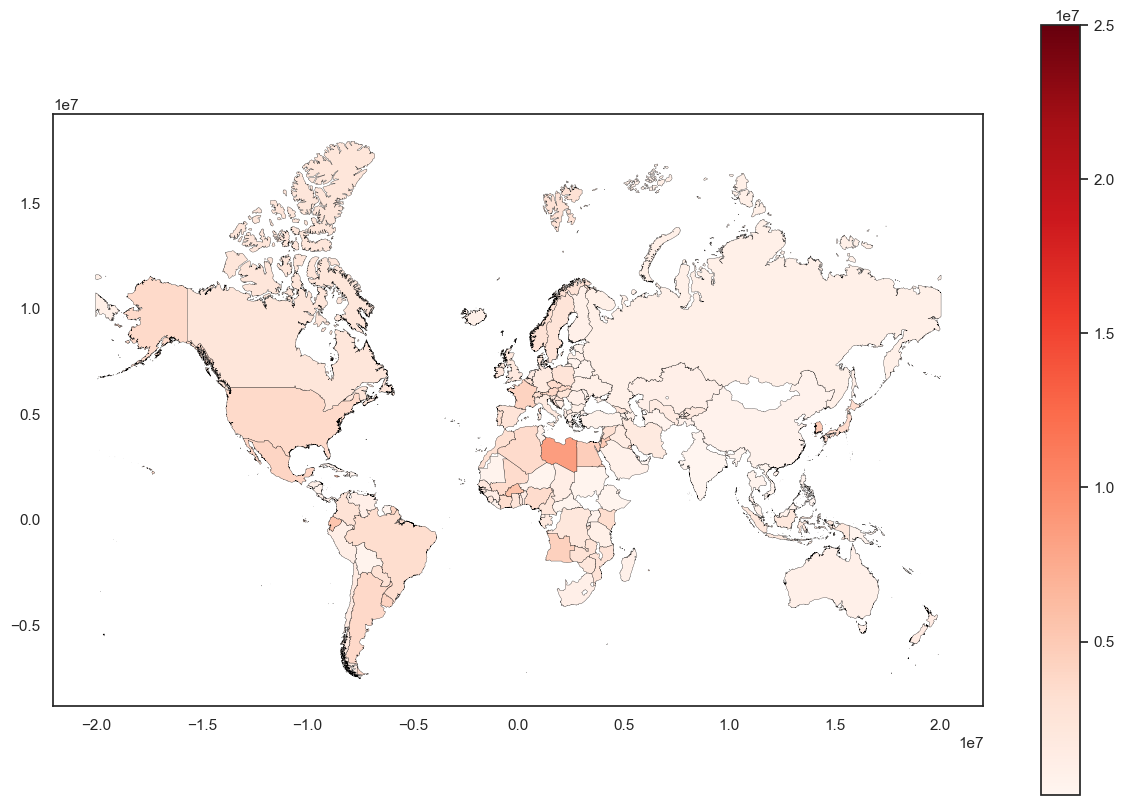

In [37]:
world_data_gdf.plot(figsize=(15,10), edgecolor='black', linewidth=0.2, column='marketValueInEur', legend=True, cmap='Reds')